<a href="https://colab.research.google.com/github/QuaziSamiha/Learning-ML/blob/main/Final_NNFS_Lab_2_(13_February%2C2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from sklearn import datasets
# import pandas as pd
import matplotlib.pyplot as plt

In [71]:
'''The make_blobs function in scikit-learn is a convenient tool 
for generating synthetic datasets with blob-like clusters. 
It is often used for testing and illustrating machine learning algorithms'''
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

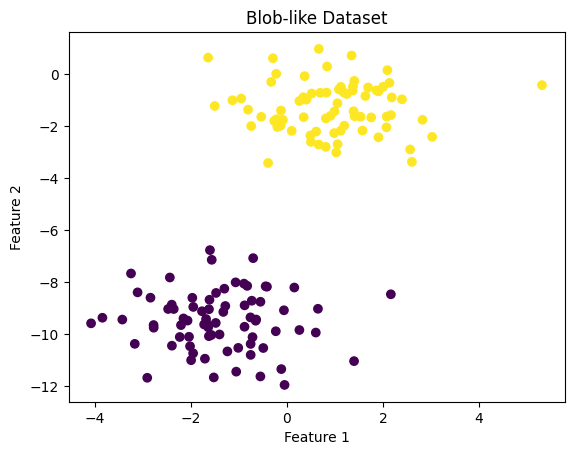

In [72]:
# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y) # the feature columns X[:, 0] and X[:, 1]as the x and y coordinates, respectively. 
# The labels y are used to assign different colors to the points.
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blob-like Dataset')
plt.show()

In [73]:
# print(X)
print(y)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


In [74]:
print(X.shape)
print(y.shape)
n_samples, n_features = X.shape
print('samples: ', n_samples)
print('features: ', n_features)

(150, 2)
(150,)
samples:  150
features:  2


In [75]:
print(X.shape[1])
print(X.shape[0])

2
150


In [76]:
# n_samples, n_features = X.shape
# init parameters
weights = np.zeros(X.shape[1])
bias = 0

print(weights.shape)
print(weights)

(2,)
[0. 0.]


In [77]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.1, n_iteration=1000):
        self.lr = learning_rate
        self.epochs = n_iteration
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        # initialize parameters
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # adapts weights
        for epoch in range(self.epochs):
          for i in range(X.shape[0]):
            y_predicted = self.activation_function(np.dot(X[i], self.weights)) 
            # y_predicted = actual output calculation
            # y[i] = target output
            # Perceptron update rule (Widrow-Hoff delta rule)
            self.weights = self.weights + self.lr * X[i] * (y[i] - y_predicted)
            # self.weights = self.weights([w1,w2]) + self.lr * (y[i] - y_predicted) * X[i]([x1,x2])
            
    def activation_function(self, activation):
      if activation >= 0:
        return 1
      else:
       return 0

    def predict(self, X):
      y_predicted=[]
      for i in range(X.shape[0]):
        # taking each row and fetching y_pridicted from each row
        y_predicted.append(self.activation_function(np.dot(X[i], self.weights) + self.bias)) 
        return y_predicted

       
# Testing
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
    # n_samples (int): The total number of data points to generate.
    # n_features (int, optional): The number of features (dimensions) of each data point. By default, it is set to 2.
    # centers (int or array-like, optional): The number of centers or the coordinates of the centers to generate the blobs. If an integer is provided, it represents the total number of centers to generate. If an array-like object is given, it should contain the coordinates of the centers
    # cluster_std (float or sequence, optional): The standard deviation of the clusters. A float value represents a constant standard deviation for all clusters, while a sequence of floats defines the standard deviation of each cluster independently.
    # random_state (int, RandomState instance, or None, optional): Determines random number generation for dataset creation
    # Returns:
          # X (array-like, shape = [n_samples, n_features]): The generated samples.
          # y (array-like, shape = [n_samples]): The integer labels for cluster membership of each sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    model = Perceptron(learning_rate=0.1, n_iteration=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Perceptron classification accuracy in percentage: ", (100*accuracy(y_test, predictions)))

Perceptron classification accuracy in percentage:  46.666666666666664


In [78]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.1, n_iteration=1000):
        self.lr = learning_rate
        self.epochs = n_iteration
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        # n_samples, n_features = X.shape
        # init parameters
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # adapts weights
        for epoch in range(self.epochs):
          for i in range(X.shape[0]):
            y_predicted = self.activation_function(np.dot(X[i], self.weights) + self.bias)
            # Perceptron update rule (Widrow-Hoff delta rule)
            update = self.lr * (y[i] - y_predicted)
            self.weights += update * X[i]
            self.bias += update

    def activation_function(self, activation):
      if activation >= 0:
        return 1
      else:
       return 0

    def predict(self, X):
      y_predicted=[]
      for i in range(X.shape[0]):
        # taking each row and fetching y_pridicted from each row
        y_predicted.append(self.activation_function(np.dot(X[i], self.weights) + self.bias)) 
        return y_predicted

       
# Testing
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
    # n_samples (int): The total number of data points to generate.
    # n_features (int, optional): The number of features (dimensions) of each data point. By default, it is set to 2.
    # centers (int or array-like, optional): The number of centers or the coordinates of the centers to generate the blobs. If an integer is provided, it represents the total number of centers to generate. If an array-like object is given, it should contain the coordinates of the centers
    # cluster_std (float or sequence, optional): The standard deviation of the clusters. A float value represents a constant standard deviation for all clusters, while a sequence of floats defines the standard deviation of each cluster independently.
    # random_state (int, RandomState instance, or None, optional): Determines random number generation for dataset creation
    # Returns:
          # X (array-like, shape = [n_samples, n_features]): The generated samples.
          # y (array-like, shape = [n_samples]): The integer labels for cluster membership of each sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    model = Perceptron(learning_rate=0.1, n_iteration=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Perceptron classification accuracy in percentage: ", (100*accuracy(y_test, predictions)))

Perceptron classification accuracy in percentage:  53.333333333333336


In [79]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.1, n_iteration=1000):
        self.lr = learning_rate
        self.epochs = n_iteration
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # adapts weights
        for epoch in range(self.epochs):
          for i in range(X.shape[0]):
            # y_predicted = self.activation_function(np.dot(X[i], self.weights) + self.bias)
            y_predicted = self.activation_function(np.dot(X[i], self.weights))
            # Perceptron update rule (modified version)
            if y_predicted == 0:
              self.weights = self.weights + (self.lr * X[i])
            else:
              self.weights = self.weights - (self.lr * X[i])
        
    def activation_function(self, activation):
      if activation >= 0:
        return 1
      else:
       return 0

    def predict(self, X):
      y_predicted=[]
      for i in range(X.shape[0]):
        y_predicted.append(self.activation_function(np.dot(X[i], self.weights) + self.bias))
        return y_predicted

       
# Testing
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    model = Perceptron(learning_rate=0.1, n_iteration=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Perceptron classification accuracy in percentage: ", (100*accuracy(y_test, predictions)))

Perceptron classification accuracy in percentage:  46.666666666666664


In [80]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.1, n_iteration=1000):
        self.lr = learning_rate
        self.epochs = n_iteration
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # adapts weights
        for epoch in range(self.epochs):
          for i in range(X.shape[0]):
            y_predicted = self.activation_function(np.dot(X[i], self.weights))
            # Perceptron update rule
            if y_predicted == 0:
              self.weights = self.weights + X[i]
            else:
              self.weights = self.weights - X[i]

    def activation_function(self, activation):
      if activation >= 0:
        return 1
      else:
       return 0

    def predict(self, X):
      y_predicted=[]
      for i in range(X.shape[0]):
        y_predicted.append(self.activation_function(np.dot(X[i], self.weights) + self.bias))
        return y_predicted

       
# Testing
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    model = Perceptron(learning_rate=0.1, n_iteration=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Perceptron classification accuracy in percentage", (100*accuracy(y_test, predictions)))

Perceptron classification accuracy in percentage 46.666666666666664


In [81]:
# w = np.random.rand(1,3) * 10
# w_1 = np.round(w[0][0], 1)
# w_2 = np.round(w[0][1], 1)
# theta = np.round(w[0][2], 1)

# x = [ [0,0], [0,1], [1,0], [1,1]]
# x_array = np.asarray(x)
# # expected outputs (AND port is the product of each entry
# out = x_array[:, 1] * x_array[:, 0]

# #step function 
# def step (net):
#     if net >= 0:
#         return 1
#     else:
#         return 0
# #the error vector 
# error = np.array([0,0,0,0])
# for i in range(len(x)):
#     f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
#     error[i] = out[i] - f_net
# E = np.sum(error)

# max_it = 1000
# t = 1
# learning_rate=0.1
# vals = [[w_1, w_2, theta]]
# while t < max_it & E != 0:
#     for i in range(len(x)):
#         f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
#         error[i] = out[i] - f_net
#         w_1 = w_1 + learning_rate * error[i] * x[i][0]
#         w_2 = w_2 + learning_rate * error[i] * x[i][1]
#         theta = theta + learning_rate*error[i]
    
#     vals.append([w_1, w_2, theta])
#     E = np.sum(error)
#    # print('sum of errors', E)
#     t = t+1

# for i in range(len(x)):
#         f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
#         error[i] = out[i] - f_net

# w_1 = w_1 + learning_rate * error[i] * x[i][0]
# w_2 = w_2 + learning_rate * error[i] * x[i][1]
# theta = theta + learning_rate*error[i]

# vals.append([w_1, w_2, theta])
# E = np.sum(error)
